In [1]:
import pandas as pd

file_path = r"C:\Users\brend\OneDrive - Stonehill College\Desktop\DORES\Trackman Games\All_Falmouth_Trackman.xlsx"
df = pd.read_excel(file_path)

metrics = ['InducedVertBreak', 'HorzBreak', 'SpinRate', 'RelSpeed', 'Extension']
for col in metrics:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

dallas_df = df[(df['Pitcher'] == 'Dallas, Matthew') & (df['Date'] == '2025-06-22')]
dallas_df = dallas_df.dropna(subset=metrics + ['TaggedPitchType'])

summary = dallas_df.groupby('TaggedPitchType').agg({
    'InducedVertBreak': 'mean',
    'HorzBreak': 'mean',
    'SpinRate': 'mean',
    'RelSpeed': ['mean', 'max'],
    'Extension': 'mean',
})

summary.columns = ['IVB', 'HB', 'SpinRate', 'AvgVelo', 'MaxVelo', 'Extension']
summary = summary.round(2)

summary['Count'] = dallas_df['TaggedPitchType'].value_counts()

summary = summary.reset_index()

print("\nPitch Summary for Matthew Dallas on 6/22:\n")
print(summary)


Pitch Summary for Matthew Dallas on 6/22:

  TaggedPitchType    IVB     HB  SpinRate  AvgVelo  MaxVelo  Extension  Count
0        ChangeUp  -2.93 -14.09   1799.89    83.81    86.36       6.59      7
1       Curveball  -7.07  15.16   2387.75    76.17    79.46       6.01      8
2          Cutter  13.53  -3.88   2333.29    91.05    91.89       6.78      5
3        Fastball  13.04 -10.04   2263.52    90.70    91.13       6.77      5
4          Sinker   3.00 -13.26   2153.31    88.85    90.23       6.61     13
5          Slider   0.91  18.19   2460.11    78.84    79.94       6.28      8


In [31]:
import pandas as pd

file_path = r"C:\Users\brend\OneDrive - Stonehill College\Desktop\DORES\Trackman Games\All_Falmouth_Trackman.xlsx"
df = pd.read_excel(file_path)

df = df[df["Pitcher"] == "Sheerin, Deven"]

df = df.dropna(subset=["TaggedPitchType", "PitchCall"])

pitch_results = df.groupby(["TaggedPitchType", "PitchCall"]).size().reset_index(name="Count")

pivot_table = pitch_results.pivot(index="TaggedPitchType", columns="PitchCall", values="Count").fillna(0).astype(int)

ball_calls = ['BallCalled', 'BallinDirt', 'HitByPitch']
strike_calls = ['StrikeCalled', 'StrikeSwinging', 'FoulBallFieldable', 'FoulBallNotFieldable', 'InPlay']

present_ball_calls = [col for col in ball_calls if col in pivot_table.columns]
present_strike_calls = [col for col in strike_calls if col in pivot_table.columns]

pivot_table['Balls'] = pivot_table[present_ball_calls].sum(axis=1)
pivot_table['Strikes'] = pivot_table[present_strike_calls].sum(axis=1)
pivot_table['Total'] = pivot_table['Balls'] + pivot_table['Strikes']

pivot_table['Strike%'] = ((pivot_table['Strikes'] / pivot_table['Total']) * 100).round(1)
pivot_table['Ball%'] = ((pivot_table['Balls'] / pivot_table['Total']) * 100).round(1)

result = pivot_table[['Balls', 'Ball%', 'Strikes', 'Strike%', 'Total']].reset_index()

result['Balls'] = result.apply(lambda row: f"{row['Balls']} ({row['Ball%']}%)", axis=1)
result['Strikes'] = result.apply(lambda row: f"{row['Strikes']} ({row['Strike%']}%)", axis=1)

result = result.drop(columns=['Ball%', 'Strike%'])

result = result[['TaggedPitchType', 'Balls', 'Strikes', 'Total']]

print(result)

PitchCall TaggedPitchType       Balls     Strikes  Total
0                ChangeUp   1 (50.0%)   1 (50.0%)      2
1                Fastball  14 (43.8%)  18 (56.2%)     32
2                  Sinker  15 (31.2%)  33 (68.8%)     48
3                  Slider  11 (50.0%)  11 (50.0%)     22




### Pitch Data for Sheerin, Deven on 2025-06-16 ###



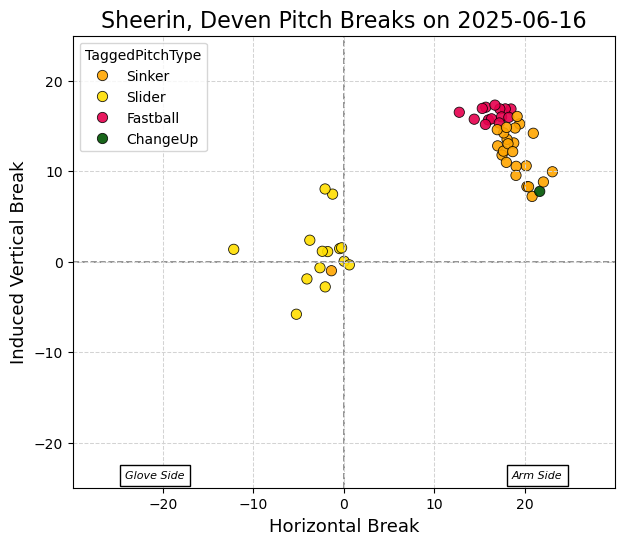

Pitch,Usage,Count,Velocity,IVB,HB,Spin,Tilt,Ext.,VAA,HAA,RelH,RelS
Sinker,45.3%,24,95.0,11.5,18.3,2411,02:02,5.9,-4.7,1.1,5.6,3.4
Slider,26.4%,14,85.8,0.9,-2.7,2358,08:42,5.8,-6.6,3.9,5.2,3.5
Fastball,26.4%,14,96.0,16.3,16.4,2445,01:33,5.9,-3.9,1.8,5.8,3.3
ChangeUp,1.9%,1,87.5,7.8,21.7,2004,02:30,6.3,-5.3,2.5,4.9,3.6




### Pitch Data for Sheerin, Deven on 2025-06-21 ###



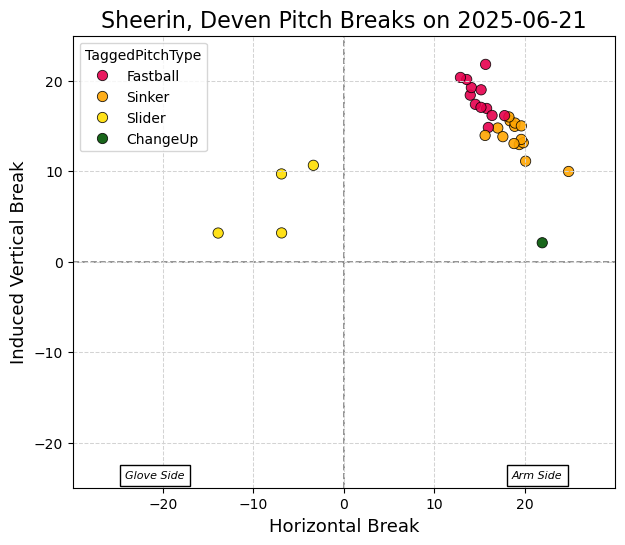

Pitch,Usage,Count,Velocity,IVB,HB,Spin,Tilt,Ext.,VAA,HAA,RelH,RelS
Sinker,45.2%,14,95.9,13.8,19.1,2324,01:52,5.7,-4.9,1.4,5.8,3.0
Fastball,38.7%,12,96.3,18.1,15.1,2359,01:23,5.7,-4.5,1.7,5.9,3.0
Slider,12.9%,4,84.4,6.7,-7.8,2254,10:11,5.6,-5.7,2.9,5.3,3.2
ChangeUp,3.2%,1,87.6,2.1,21.9,1575,03:00,5.9,-6.0,0.8,5.3,3.5




### Pitch Data for Sheerin, Deven on 2025-06-25 ###



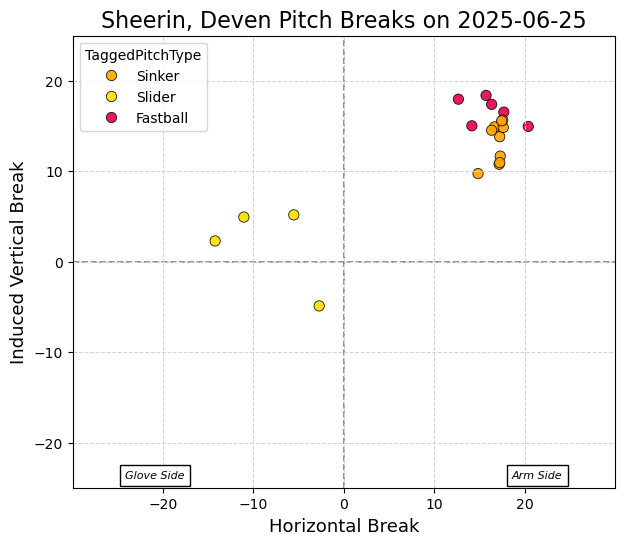

Pitch,Usage,Count,Velocity,IVB,HB,Spin,Tilt,Ext.,VAA,HAA,RelH,RelS
Sinker,50.0%,10,94.9,13.2,16.9,2279,01:50,5.9,-5.4,2.1,5.9,2.7
Fastball,30.0%,6,95.3,16.7,16.2,2318,01:32,5.8,-5.2,2.8,6.0,2.7
Slider,20.0%,4,83.2,1.9,-8.4,2451,08:57,5.8,-5.1,3.8,5.6,3.0


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import math
from datetime import time
from IPython.display import display, HTML

file_path = r"C:\Users\brend\OneDrive - Stonehill College\Desktop\DORES\Trackman Games\All_Falmouth_Trackman.xlsx"
pitcher_name = "Sheerin, Deven"

df = pd.read_excel(file_path)

df = df[df["Pitcher"] == pitcher_name]

df['Date'] = pd.to_datetime(df['Date'])

color_dict = {
    'Fastball': '#e6004d',
    'Sinker': '#FFA500',
    'Cutter': '#7A3E48',
    'ChangeUp': '#005502',
    'Splitter': '#34DDDD',
    'Slider': '#FFDE00',
    'Curveball': '#66CCFF',
    'Unknown': '#CCCCCC',
}

def break_plot(df: pd.DataFrame, ax: plt.Axes, pitcher_hand: str):

    if pitcher_hand == 'R':
        sns.scatterplot(
            ax=ax,
            x=df['HorzBreak'],
            y=df['InducedVertBreak'],
            hue=df['TaggedPitchType'],
            palette=color_dict,
            edgecolor='black',
            alpha=0.9,
            s=55,
            legend='full'
        )
    elif pitcher_hand == 'L':
        sns.scatterplot(
            ax=ax,
            x=-df['HorzBreak'],
            y=df['InducedVertBreak'],
            hue=df['TaggedPitchType'],
            palette=color_dict,
            edgecolor='black',
            alpha=0.9,
            s=55,
            legend='full'
        )
    else:
        return

    ax.axhline(0, color='gray', linestyle='--', linewidth=1.2)
    ax.axvline(0, color='gray', linestyle='--', linewidth=1.2)
    for tick in range(-20, 21, 10):
        ax.axhline(tick, color='#D3D3D3', linestyle='--', linewidth=0.75)
        ax.axvline(tick, color='#D3D3D3', linestyle='--', linewidth=0.75)
    ax.set_xlim(-30, 30)
    ax.set_ylim(-25, 25)
    ax.set_xticks(range(-20, 21, 10))
    ax.set_yticks(range(-20, 21, 10))
    ax.set_xlabel('Horizontal Break', fontsize=13)
    ax.set_ylabel('Induced Vertical Break', fontsize=13)
    ax.set_aspect('equal', adjustable='box')

    if pitcher_hand == 'R':
        ax.text(-24.2, -24.2, 'Glove Side', fontstyle='italic', ha='left', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=8)
        ax.text(24.2, -24.2, 'Arm Side', fontstyle='italic', ha='right', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=8)
    elif pitcher_hand == 'L':
        ax.invert_xaxis()
        ax.text(24.2, -24.2, 'Arm Side', ha='left', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=8)
        ax.text(-24.2, -24.2, 'Glove Side', ha='right', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black'), fontsize=8)

def average_tilt(tilt_series):
    if tilt_series.dropna().empty:
        return "N/A"
    def time_to_angle(t):
        return ((t.hour % 12) + t.minute / 60) * 30 
    angles = tilt_series.dropna().apply(time_to_angle)
    radians = angles * math.pi / 180
    x = sum(math.cos(r) for r in radians) / len(radians)
    y = sum(math.sin(r) for r in radians) / len(radians)
    avg_angle_rad = math.atan2(y, x)
    avg_angle_deg = (avg_angle_rad * 180 / math.pi) % 360
    hour = int(avg_angle_deg // 30)
    minute = int((avg_angle_deg % 30) * 2)
    return f"{(hour if hour != 0 else 12):02d}:{minute:02d}"

def create_statcast_table(df):
    pitch_types = df['TaggedPitchType'].dropna().unique()
    total_count = len(df)
    table_rows = []

    for pitch in pitch_types:
        pitch_data = df[df['TaggedPitchType'] == pitch]
        if pitch_data.empty:
            continue
        count = len(pitch_data)
        usage = (count / total_count) * 100 if total_count else 0
        velocity = round(pitch_data['RelSpeed'].mean(skipna=True), 1)
        ivb = round(pitch_data['InducedVertBreak'].mean(skipna=True), 1)
        hb = round(pitch_data['HorzBreak'].mean(skipna=True), 1)
        spin = round(pitch_data['SpinRate'].mean(skipna=True)) if not pitch_data['SpinRate'].isna().all() else 0
        tilt = average_tilt(pitch_data['Tilt']) if 'Tilt' in pitch_data.columns else 'N/A'
        ext = round(pitch_data['Extension'].mean(skipna=True), 1) if 'Extension' in pitch_data.columns else 0
        vaa = round(pitch_data['VertApprAngle'].mean(skipna=True), 1) if 'VertApprAngle' in pitch_data.columns else 0
        haa = round(abs(pitch_data['HorzApprAngle'].mean(skipna=True)), 1) if 'HorzApprAngle' in pitch_data.columns else 0
        relh = round(pitch_data['RelHeight'].mean(skipna=True), 1) if 'RelHeight' in pitch_data.columns else 0
        rels = round(pitch_data['RelSide'].abs().mean(skipna=True), 1) if 'RelSide' in pitch_data.columns else 0

        table_rows.append([
            pitch, f"{usage:.1f}%", count, velocity, ivb, hb, spin, tilt, ext, vaa, haa, relh, rels
        ])

    return pd.DataFrame(table_rows, columns=[
        'Pitch', 'Usage', 'Count', 'Velocity', 'IVB', 'HB', 'Spin', 'Tilt', 'Ext.', 'VAA', 'HAA', 'RelH', 'RelS'
    ])

pitcher_hand = 'R'

for date, group_df in df.groupby('Date'):
    print(f"\n\n### Pitch Data for {pitcher_name} on {date.date()} ###\n")

    fig, ax = plt.subplots(figsize=(7, 7))
    break_plot(group_df, ax, pitcher_hand)
    plt.title(f"{pitcher_name} Pitch Breaks on {date.date()}", fontsize=16)
    plt.show()

    pitch_table_df = create_statcast_table(group_df).sort_values(by="Count", ascending=False)

    def color_pitch_name(val):
        color = color_dict.get(val, '#000000')
        return f'color: {color}'

    styled_df = pitch_table_df.style \
        .map(color_pitch_name, subset=['Pitch']) \
        .format({
            'Velocity': '{:.1f}', 
            'IVB': '{:.1f}', 
            'HB': '{:.1f}', 
            'Spin': '{:.0f}', 
            'Ext.': '{:.1f}', 
            'VAA': '{:.1f}', 
            'HAA': '{:.1f}', 
            'RelH': '{:.1f}', 
            'RelS': '{:.1f}',
            'Count': '{:d}'
        }) \
        .hide(axis='index')

    display(HTML(f"<h2>Pitch Metrics on {date.date()}</h2>"))
    display(styled_df)

In [51]:
import pandas as pd
import math
from datetime import time
from IPython.display import display, HTML

file_path = r"C:\Users\brend\OneDrive - Stonehill College\Desktop\DORES\Trackman Games\All_Falmouth_Trackman.xlsx"
pitcher_name = "Sheerin, Deven"

df = pd.read_excel(file_path)
df = df[df["Pitcher"] == pitcher_name]
df['Date'] = pd.to_datetime(df['Date'])

def average_tilt(tilt_series):
    if tilt_series.dropna().empty:
        return "N/A"
    def time_to_angle(t):
        return ((t.hour % 12) + t.minute / 60) * 30
    angles = tilt_series.dropna().apply(time_to_angle)
    radians = angles * math.pi / 180
    x = sum(math.cos(r) for r in radians) / len(radians)
    y = sum(math.sin(r) for r in radians) / len(radians)
    avg_angle_rad = math.atan2(y, x)
    avg_angle_deg = (avg_angle_rad * 180 / math.pi) % 360
    hour = int(avg_angle_deg // 30)
    minute = int((avg_angle_deg % 30) * 2)
    return f"{(hour if hour != 0 else 12):02d}:{minute:02d}"

for date, game_df in df.groupby('Date'):
    fb_data = game_df[game_df['TaggedPitchType'].isin(['Fastball', 'Sinker'])]
    total_pitches = len(game_df)

    if fb_data.empty:
        print(f"\nNo FB/SI data for {pitcher_name} on {date.date()}")
        continue

    count = len(fb_data)
    usage = (count / total_pitches) * 100 if total_pitches else 0
    velocity = round(fb_data['RelSpeed'].mean(skipna=True), 1)
    ivb = round(fb_data['InducedVertBreak'].mean(skipna=True), 1)
    hb = round(fb_data['HorzBreak'].mean(skipna=True), 1)
    spin = round(fb_data['SpinRate'].mean(skipna=True)) if not fb_data['SpinRate'].isna().all() else 0
    tilt = average_tilt(fb_data['Tilt']) if 'Tilt' in fb_data.columns else 'N/A'
    ext = round(fb_data['Extension'].mean(skipna=True), 1) if 'Extension' in fb_data.columns else 0
    vaa = round(fb_data['VertApprAngle'].mean(skipna=True), 1) if 'VertApprAngle' in fb_data.columns else 0
    haa = round(abs(fb_data['HorzApprAngle'].mean(skipna=True)), 1) if 'HorzApprAngle' in fb_data.columns else 0
    relh = round(fb_data['RelHeight'].mean(skipna=True), 1) if 'RelHeight' in fb_data.columns else 0
    rels = round(fb_data['RelSide'].abs().mean(skipna=True), 1) if 'RelSide' in fb_data.columns else 0

    result_df = pd.DataFrame([[
        "FB/SI", f"{usage:.1f}%", count, velocity, ivb, hb, spin, tilt, ext, vaa, haa, relh, rels
    ]], columns=[
        'Pitch', 'Usage', 'Count', 'Velocity', 'IVB', 'HB', 'Spin', 'Tilt',
        'Ext.', 'VAA', 'HAA', 'RelH', 'RelS'
    ])

    display(HTML(f"<h2>FB/SI Metrics for {pitcher_name} on {date.date()}</h2>"))
    display(result_df.style.format({
        'Velocity': '{:.1f}', 
        'IVB': '{:.1f}', 
        'HB': '{:.1f}', 
        'Spin': '{:.0f}', 
        'Ext.': '{:.1f}', 
        'VAA': '{:.1f}', 
        'HAA': '{:.1f}', 
        'RelH': '{:.1f}', 
        'RelS': '{:.1f}',
        'Count': '{:d}'
    }).hide(axis='index'))

Pitch,Usage,Count,Velocity,IVB,HB,Spin,Tilt,Ext.,VAA,HAA,RelH,RelS
FB/SI,71.7%,38,95.4,13.3,17.6,2424,01:51,5.9,-4.4,1.4,5.7,3.3


Pitch,Usage,Count,Velocity,IVB,HB,Spin,Tilt,Ext.,VAA,HAA,RelH,RelS
FB/SI,83.9%,26,96.1,15.8,17.2,2340,01:39,5.7,-4.7,1.5,5.9,3.0


Pitch,Usage,Count,Velocity,IVB,HB,Spin,Tilt,Ext.,VAA,HAA,RelH,RelS
FB/SI,80.0%,16,95.0,14.5,16.6,2293,01:44,5.9,-5.3,2.4,6.0,2.7
